# AceleraDev Data Science - Semana 3

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###### Importando os dados

In [3]:
base_cred = pd.read_csv('desafio1.csv')

In [4]:
print("----------Top-5- Record----------")
print(base_cred.head(5))
print("-----------Information-----------")
print(base_cred.info())
print("-----------Data Types-----------")
print(base_cred.dtypes)
print("----------Missing value-----------")
print(base_cred.isnull().sum())
print("----------Null value-----------")
print(base_cred.isna().sum())
print("----------Shape of Data----------")
print(base_cred.shape)

----------Top-5- Record----------
   RowNumber                                        id  \
0          1  e7f44fcbd380d4cef7e6c232cc7e37895c3fd197   
1          2  28dcb083ad90512da16b9430085c2cddb8ca5e12   
2          3  774bc378f787438c9c7594e536787d07a097a54b   
3          4  043a71326f7096de155e7f0c559dc62b5e4b7239   
4          5  37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22   

                                  sobrenome  pontuacao_credito  \
0  6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50                619   
1  48e1ad846796fa314f1b4a6702b83343eb5482c5                608   
2  f2b29d5d934de615812b697132e767dea0f1e9e2                502   
3  85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2                699   
4  ddc89c837a6933639de75f28171057060bd322df                850   

  estado_residencia genero  idade  nivel_estabilidade  saldo_conta  \
0                SC      F     42                   2         0.00   
1                RS      F     41                   1     83807.86   
2         

In [5]:
base_cred.head(10)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1
5,6,db5cf32c3fbc7c5d8f8313afca1d099de6dc055f,a596384ca70664af4c5fac9f935cff186b8e8bc0,645,RS,M,44,8,113755.78,2,1,0
6,7,8f3cc64a0a84bab38fefb030f09757d0cbf03bb2,abec3e525ab40e45975c91d4fa2bc7b318d93de4,822,SC,M,50,7,0.00,2,1,1
7,8,6704b822c203e2dda9f225dfc4f1bed2ae9044e6,336b42483e6a17f48eb040a251b5d6e64d1351a9,376,PR,F,29,4,115046.74,4,1,0
8,9,35f41954a87f722a3960e5fa8ce898a09398a564,53a417796c777851003b3f2431e8eef5625ec15b,501,SC,M,44,4,142051.07,2,0,1
9,10,f110be36fc6171a7da472b9cbac8698df880aac6,b89d09fc7719cb3c4a87e4a61cb87b3465e9d8ff,684,SC,M,27,2,134603.88,1,1,1


## Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?

In [9]:
# Calculando a média em 'Pontuação crédito'
base_cred['pontuacao_credito'].mean()

649.787

In [10]:
# Calculando a mediana em 'Pontuação crédito'
base_cred['pontuacao_credito'].median()

651.0

In [11]:
# Calculando o desvio padrão em 'Pontuação crédito'
base_cred['pontuacao_credito'].std()

97.04627864889999

In [12]:
# Mesmo cálculo utilizando describe
base_cred['pontuacao_credito'].describe()

count    7000.000000
mean      649.787000
std        97.046279
min       350.000000
25%       582.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: pontuacao_credito, dtype: float64

In [17]:
# Utilizando 'agg' para criar um dataframe com as funções média, moda, mediana e desvio padrão:
subm = base_cred.groupby('estado_residencia')['pontuacao_credito'].agg([pd.Series.mode,np.median,np.mean,np.std])
subm.round(2)

,mode,median,mean,std
estado_residencia,,,,
PR,850,650,648.96,98.61
RS,850,650,651.11,95.14
SC,850,653,649.54,97.23


In [19]:
# Utilizando sort values para deixar em ordem decrescente (padrão exigido para a resposta):
subm = subm.sort_values(by='estado_residencia', ascending=False)
subm.round(2)

,mode,median,mean,std
estado_residencia,,,,
SC,850,653,649.54,97.23
RS,850,650,651.11,95.14
PR,850,650,648.96,98.61


In [20]:
# Renomeando as colunas para a resposta se adequar ao solicitado:
resposta = subm.rename(columns={"mode": "moda", "median": "mediana", "mean": "media", "std": "desvio_padrao"})

In [16]:
# Gravando o arquivo json:
resposta.to_json('submission.json',orient='index')

## Análise Exploratória dos dados:

Material encontrado no repositório do Nilson Oliveira:  https://github.com/nilrco/codenation

<IPython.core.display.Javascript object>


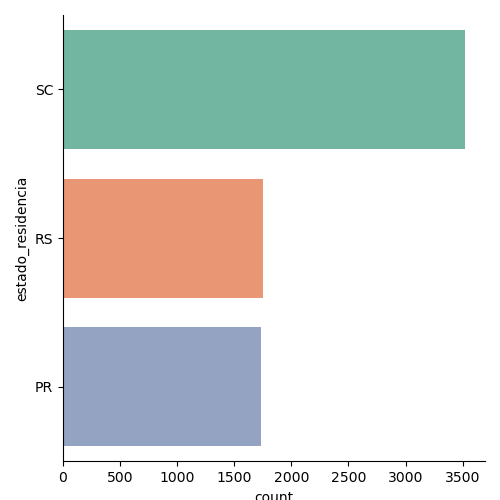

In [28]:
%matplotlib notebook
sns.catplot(y='estado_residencia', kind='count', palette='Set2', data=base_cred)

<IPython.core.display.Javascript object>


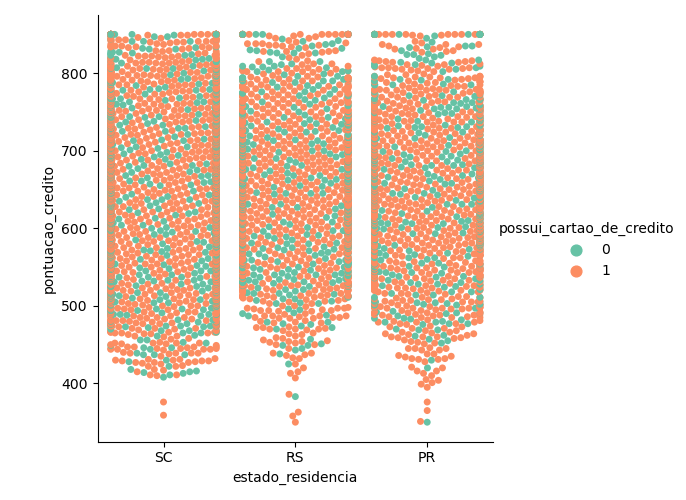

In [29]:
%matplotlib notebook
sns.catplot(x='estado_residencia', y='pontuacao_credito',
            hue='possui_cartao_de_credito', kind='swarm', palette='Set2', data=base_cred)

<IPython.core.display.Javascript object>


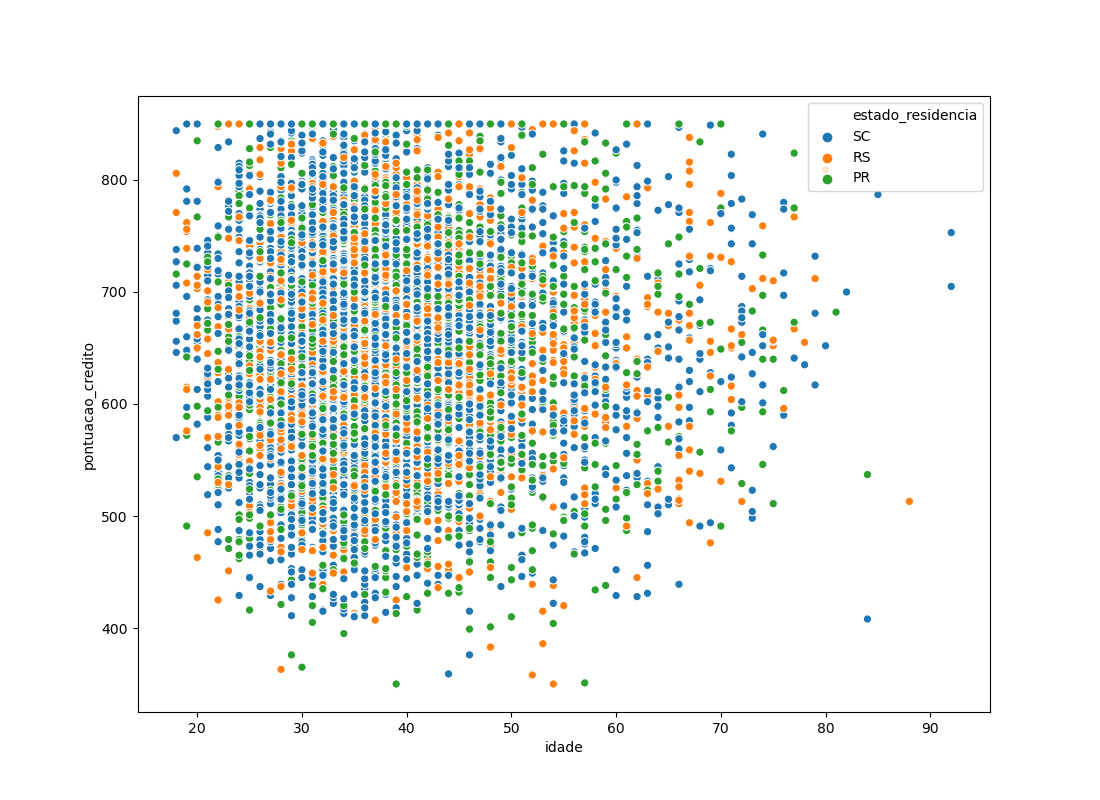

In [32]:
%matplotlib notebook
f, ax = plt.subplots(figsize=(11, 8))
sns.scatterplot(x="idade", y="pontuacao_credito",
                hue="estado_residencia", data=base_cred, sizes=(10000, 1000))

<IPython.core.display.Javascript object>


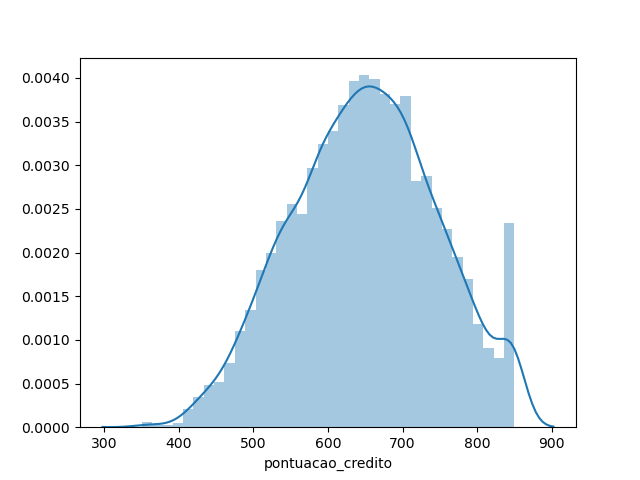

In [33]:
%matplotlib notebook
sns.distplot(base_cred.pontuacao_credito)

## Verificando a correlação entre algumas variáveis:

In [35]:
features = ['pontuacao_credito', 'saldo_conta',
            'possui_cartao_de_credito', 'membro_ativo']
correlation = base_cred[features].corr()
correlation

,pontuacao_credito,saldo_conta,possui_cartao_de_credito,membro_ativo
pontuacao_credito,1.000000,0.009761,-0.007987,0.033992
saldo_conta,0.009761,1.000000,-0.019398,-0.006482
possui_cartao_de_credito,-0.007987,-0.019398,1.000000,-0.014564
membro_ativo,0.033992,-0.006482,-0.014564,1.000000


<IPython.core.display.Javascript object>


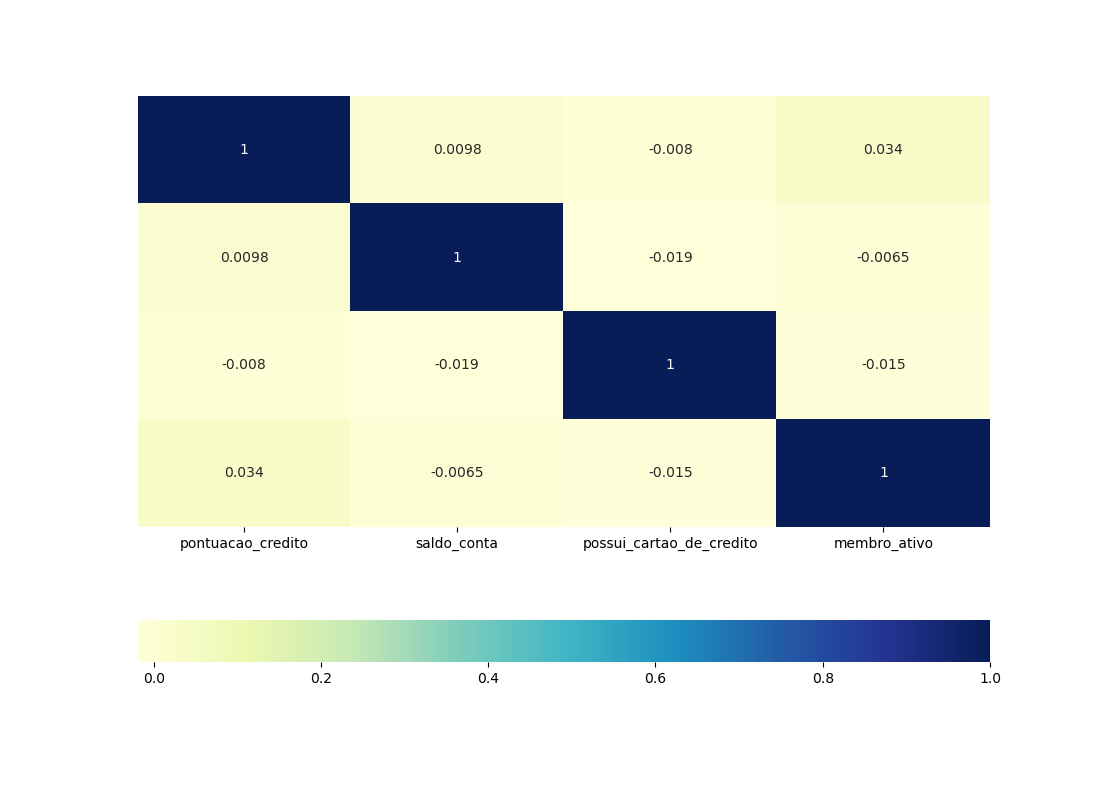

In [36]:
%matplotlib notebook
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(correlation, annot=True, yticklabels=False,
            cmap='YlGnBu', cbar_kws={"orientation": "horizontal"})